# **LAB 01: Trực quan hóa dữ liệu với Python**
---

## Lớp: Trực quan hoá dữ liệu 20_21

### **Thông tin nhóm:**

| Index   |     Họ và Tên     |  MSSV |
|---------|:--------------|:---------|
| 1       | Nguyễn Đức Minh Quân         |20120357|
| 2       |          | |
| 3       |             |         |
| 4       |             |         |

---

<p style="font-size:35px; color:#90c251;font-weight:bold; font-family:Barlow;">
A. Thu thập dữ liệu <br>

### Ngữ cảnh chọn chủ đề

### Nguồn dữ liệu

### Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Đọc file csv

In [2]:
df = pd.read_csv('matches.csv', index_col=0) 
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City


<p style="font-size:35px; color:#90c251;font-weight:bold; font-family:Barlow;">
B. Khám phá dữ liệu <br>

### **Dữ liệu có bao nhiêu dòng và cột?**

In [3]:
num_rows,num_cols=df.shape
print('Số cột : {}'.format(num_cols))
print('Số dòng: {}'.format(num_rows))

Số cột : 27
Số dòng: 2721


### **Mỗi dòng có ý nghĩa gì?**

Các dòng có ý nghĩa giống nhau là những thông số được ghi lại của một trận đấu thuộc khuôn khổ giải đấu Ngoại Hạng Anh (Premier League) từ năm 2019 - 2023.

### **Các dòng có bị lặp hay không?**

In [4]:
have_duplicated_rows = df.duplicated().any()

if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


### **Mỗi cột có ý nghĩa gì**

Các cột

In [5]:
df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

1. **date:**  Ngày tháng năm diễn ra trận đấu
2. **time:**  Thời gian diễn ra trận đấu
3. **comp:**  Giải đấu
4. **round:**  Vòng đấu
5. **day:**  Thứ ngày diễn ra trận đấu
6. **venue:**  Đội nhà (Home), Đội khách (Away)
7. **result:**  Kết quả: W(Thắng), D(Hoà), L(Thua) 
8. **gf:**  Goals For - Bàn thắng ghi được
9. **ga:**  Goals Against - Bàn thua nhận được
10. **opponent:**  Tên đội bóng đối đầu
11. **xg:**  Expected Goals - Dự đoán bàn thắng ghi được
12. **xga:**  Expected Goals Against - Số bàn thua dự đoán
13. **poss:**  Kiểm soát bóng
14. **attendeance:**  Số khán giả cổ vũ
15. **captain:**  Tên đội trưởng
16. **formation:**  Đội hình ra sân
17. **referee:**  Trọng tài chính
18. **match report:**  Báo cáo trận đấu
19. **notes:**  Ghi chú về trận đấu
20. **sh:**  Số lượt sút
21. **sot:**  Số lượt sút trúng đích
22. **dist:** 
23. **fk:**  Số lần sút phạt cố định
24. **pk:**  Số bàn phạt đền
25. **pkatt:**  Số lần sút phạt đền
26. **season:**  Mùa giải
27. **team:**  Đội bóng thống kê

### **Mỗi cột có kiểu dữ liệu gì?**

In [6]:
df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Ta nhận thấy cột dữ liệu ngày tháng cần được chuyển sang dạng datetime

In [7]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

### **Có cột nào không cần thiết phải xoá không?**

Tìm những cột có 1 giá trị duy nhất

In [8]:
df.nunique()

date            440
time             19
comp              1
round            38
day               7
venue             2
result            3
gf               10
ga               10
opponent         25
xg               48
xga              48
poss             63
attendance      859
captain         140
formation        21
referee          28
match report      1
notes             0
sh               32
sot              16
dist            183
fk                5
pk                4
pkatt             4
season            4
team             25
dtype: int64

Ta thấy có 3 cột "comp", "match report", "notes" có 0 và 1 giá trị duy nhất không cần thiết nên ta xóa đi

In [9]:
df = df.drop(['comp','match report','notes'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,4-3-3,Michael Oliver,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,4-2-3-1,David Coote,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,4-3-3,Jarred Gillett,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,4-2-3-1,Darren England,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,4-2-3-1,Paul Tierney,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,Matchweek 34,Tue,Away,L,1.0,2.0,Watford,1.2,...,4-2-3-1,Anthony Taylor,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
39,2020-07-11,12:30,Matchweek 35,Sat,Home,L,0.0,4.0,West Ham,0.6,...,4-2-3-1,Kevin Friend,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
40,2020-07-14,20:15,Matchweek 36,Tue,Away,L,0.0,1.0,Chelsea,0.1,...,4-1-4-1,Jonathan Moss,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
41,2020-07-18,17:30,Matchweek 37,Sat,Home,L,0.0,2.0,Burnley,0.3,...,4-2-3-1,Kevin Friend,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


### **Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?**

Với mỗi cột numeric, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max".

In [10]:
nume_col_profiles_df = df.select_dtypes('number')
missing_ratio = nume_col_profiles_df.isnull().sum() * 100 / len(df)
min_value = nume_col_profiles_df.min()
max_value = nume_col_profiles_df.max()
nume_col_profiles_df = pd.DataFrame(data = [missing_ratio, min_value, max_value], 
                                    index = ['missing_ratio', 'min', 'max'])

nume_col_profiles_df.round(2)

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season
missing_ratio,0.0,0.0,0.0,0.0,0.0,32.34,0.0,0.0,0.04,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,18.0,2000.00,0.0,0.0,5.30,0.0,0.0,0.0,2020.0
max,9.0,9.0,5.9,5.9,82.0,75546.00,31.0,15.0,35.00,4.0,3.0,3.0,2023.0


Với mỗi cột categorical, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"

In [11]:
nume_col = df.select_dtypes('number').columns.to_list()
cate_col_profiles_df = df.drop(nume_col, axis=1)
missing_ratio = cate_col_profiles_df.isnull().sum() * 100 / len(df)
num_diff = cate_col_profiles_df.nunique()
list_unique = num_diff.copy()

for col in cate_col_profiles_df.columns:
    list_unique[col] = cate_col_profiles_df[col].dropna().unique()

cate_col_profiles_df = pd.DataFrame(data = [missing_ratio, num_diff, list_unique], 
                                  index = ['missing_ratio', 'num_diff_vals', 'diff_vals'])
cate_col_profiles_df

,date,time,round,day,venue,result,opponent,captain,formation,referee,team
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,440,19,38,7,2,3,25,140,21,28,25
diff_vals,"[2022-08-07T00:00:00.000000000, 2022-08-13T00:...","[16:30, 15:00, 19:30, 17:30, 12:30, 14:00, 20:...","[Matchweek 1, Matchweek 2, Matchweek 3, Matchw...","[Sun, Sat, Wed, Thu, Fri, Mon, Tue]","[Away, Home]","[W, D, L]","[West Ham, Bournemouth, Newcastle Utd, Crystal...","[İlkay Gündoğan, Kevin De Bruyne, Kyle Walker,...","[4-3-3, 4-2-3-1, 3-4-3, 3-2-4-1, 4-4-2, 4-1-4-...","[Michael Oliver, David Coote, Jarred Gillett, ...","[Manchester City, Arsenal, Manchester United, ..."


### **Dữ liệu có cần xử lý gì khác trước khi phân tích hay không?**

Có một cột Category nhưng mà cần được sắp xếp theo thứ tự để tiện cho việc phân tích, đó là cột `round`, ta chỉ lấy chỉ số của vòng đấu và không lấy cụm từ `Matchweek`

In [12]:
df['round'] = df['round'].str.extract('(\d+)', expand=False).astype(int)
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,4-3-3,Michael Oliver,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,4-2-3-1,David Coote,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,4-3-3,Jarred Gillett,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,4-2-3-1,Darren England,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,4-2-3-1,Paul Tierney,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,34,Tue,Away,L,1.0,2.0,Watford,1.2,...,4-2-3-1,Anthony Taylor,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
39,2020-07-11,12:30,35,Sat,Home,L,0.0,4.0,West Ham,0.6,...,4-2-3-1,Kevin Friend,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
40,2020-07-14,20:15,36,Tue,Away,L,0.0,1.0,Chelsea,0.1,...,4-1-4-1,Jonathan Moss,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
41,2020-07-18,17:30,37,Sat,Home,L,0.0,2.0,Burnley,0.3,...,4-2-3-1,Kevin Friend,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


<p style="font-size:35px; color:#90c251; font-weight:bold; font-family:Barlow;">
C. Khám phá mối quan hệ trong dữ liệu <br>

<p style="font-size:25px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 1: Ta chưa bàn đến việc suy nghĩ về tập dữ liệu, ta hãy dùng số liệu để xem sự tương quan giữa chúng để xét đến những suy nghĩ của ta xem có đúng không. <br>

## **Biểu đồ Heatmap biểu diễn hệ số tương quan giữa các thông số**
## Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt

## Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [158]:
def heatmap_first(df):
    df_plot = df.drop(['round','season'],axis=1)
    plt.figure(figsize=(12, 12))
    mask = np.zeros_like(df_plot.corr())
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df_plot.corr(numeric_only=True), cmap='coolwarm', annot=True, mask=mask)
    plt.title("So sánh hệ số tương quan giữa các thông số", fontsize= 25)
    plt.show()

C:\Users\MinhQuan\AppData\Local\Temp\ipykernel_13292\1554256183.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df_plot.corr())


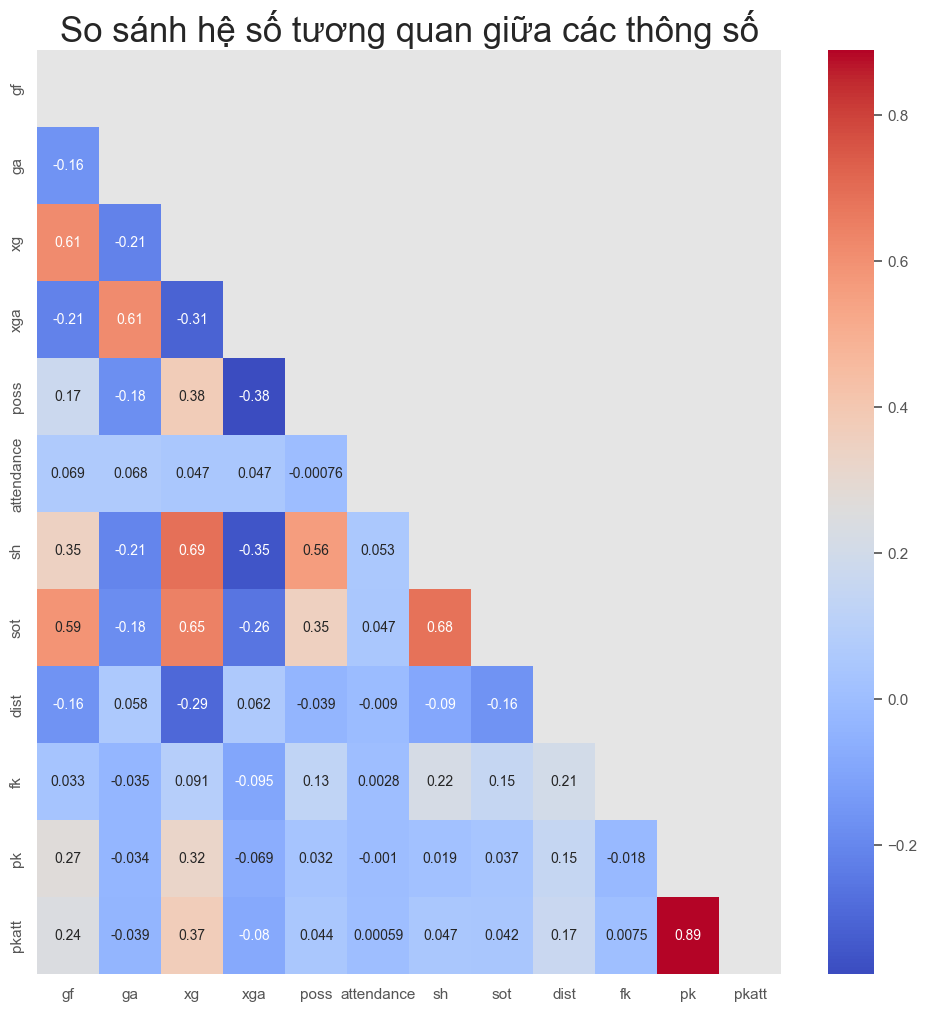

In [159]:
heatmap_first(df)

# Phân tích kết quả của biểu đồ 
- Giá trị của mỗi hệ số tương quan sẽ nằm trong [-1, 1]. Trong đó khi giá trị càng gần về -1 hoặc 1 thì mối quan hệ giữa các biến số càng mạnh. Giá trị gần 0 thì cho thấy sự độc lập giữa các biến số.
- Ví dụ khi giá trị gần về 1 sẽ cho thấy sự tích cực mạnh giữa 2 thuộc tính ( giá trị của thuộc tính này tăng thì thuộc tính kia cũng tăng ), khi gần về -1 sẽ tiêu cực mạnh ( giá trị thuộc tính này tăng thì giá trị thuộc tính kia giảm ).
- Thuộc tính pk và pkatt có mối quan hệ mạnh nhất.
- Mối quan hệ giữa thuộc tính attendance với bất kì các thuộc tính khác đều cho thấy sự độc lập cao.

## **Biểu đồ Heatmap so sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median**

## Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt, team, result
## Xử lý dữ liệu
- Gom nhóm các thông số theo từng đội.
- Sử dụng phương pháp min-max để chuẩn hóa các giá trị của các dữ liệu số.
- Với từng đội, các giá trị của một chỉ số ( trừ result ) được thu thập qua từng trận sẽ tìm mean và median và thông qua hệ số lệch skewness để chọn ra giá trị mean hay median sẽ làm giá trị đại diện cho chỉ số đó.
- Bỏ qua các giá trị trống của dữ liệu khi tính mean hoặc median.
- Riêng thuộc tính result, giữ lại các giá trị 'W'.
## Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [161]:
import math

In [162]:
def findSkewnessBasedOnPearson(mean,median, standard_deviation):
    skewness = 3*(mean-median)/standard_deviation
    return skewness

def chooseMeanOrMedian(skewness):
    if math.fabs(skewness) < 0.5:
        return 'mean'
    return 'median'

In [163]:
def preprocessing_data(df):
    list_of_teams = df['team'].unique()
    list_of_attributes = ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt']
    df = df.loc[:, ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt', 'team', 'result']]
    df_norm = df[list_of_attributes]
    df_norm = (df_norm - df_norm.min())/(df_norm.max()-df_norm.min())

    df[list_of_attributes] = df_norm

    data = {team: {attribute: -1 for attribute in list_of_attributes} for team in list_of_teams}
    for team in list_of_teams:
        data[team]['result'] = -1
    for attribute in list_of_attributes:
        value_group_by_team = df.groupby('team')[attribute].apply(list)
        mean_s = value_group_by_team.apply(lambda x: np.nanmean(x))
        median_s = value_group_by_team.apply(lambda x: np.nanmedian(x))
        std_s = value_group_by_team.apply(lambda x: np.nanstd(x))
        value = {team: 0 for team in list_of_teams}
        for team in list_of_teams:
            skewness = findSkewnessBasedOnPearson(mean_s[team],median_s[team], std_s[team])
            option = chooseMeanOrMedian(skewness)
            if option == 'mean':
                value[team] = mean_s[team]
            else:
                value[team] = median_s[team]
        if len(set(value.values())) > 2:
            for team in list_of_teams:
                data[team][attribute] = value[team]
        else:
            for team in list_of_teams:
                del data[team][attribute]
    
    #xử lý cột result 
    win_result = {team: 0 for team in list_of_teams}
    value_group_by_team = df.groupby('team')['result'].apply(list)
    for team in list_of_teams:
        win_result[team] = value_group_by_team[team].count('W')
    
    min_win_value = min(win_result.values())
    max_win_value = max(win_result.values())
    for team in list_of_teams:
        data[team]['result'] = (win_result[team] - min_win_value)/(max_win_value-min_win_value)
    return data


In [164]:
def heatmap_second(data):    
    dt = pd.DataFrame.from_dict(data, orient='index')
    df_tall = dt.reset_index().melt(id_vars=['index'], var_name='Index', value_name='Value')
    df_tall = df_tall.rename(columns={'index': 'Team'})

    # Vẽ biểu đồ nhiệt
    plt.figure(figsize=(10, 10))
    plt.title("So sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median", fontsize=20)
    sns.heatmap(df_tall.pivot(index='Team', columns='Index', values='Value'), annot=True, cmap="coolwarm")
    plt.show()

In [197]:
data = preprocessing_data(df)

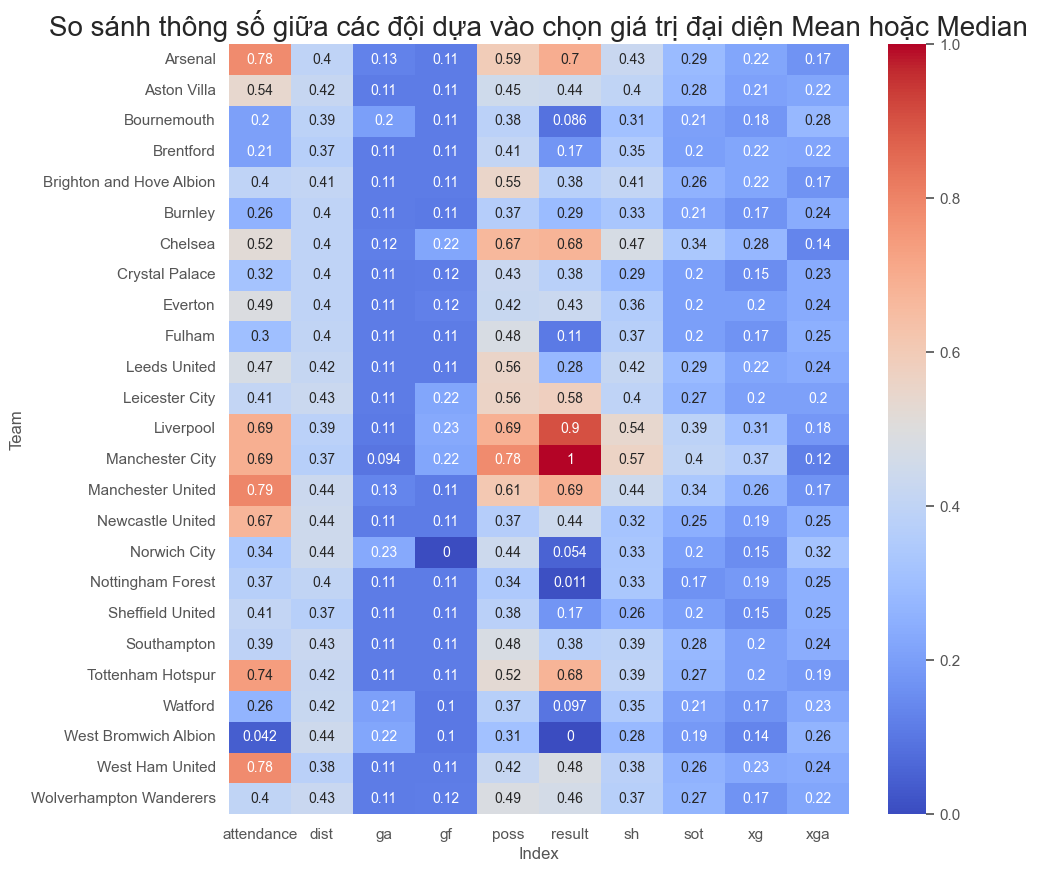

In [166]:
heatmap_second(data)

# Phân tích kết quả của biểu đồ
- Giá trị của mỗi chỉ số của 1 đội sẽ từ 0 đến 1. Trong đó giá trị tiến về 0 thì chỉ số càng thấp, giá trị tiến về 1 chỉ số càng vượt trội so với các đội khác.
- Dựa vào ngữ nghĩa mục tiêu khi vẽ biểu đồ, ta thấy đội Manchester City chiếm nhiều chỉ số trên sân vượt trội nhất với 4 trên 9 chỉ số ( poss, sh, sot, xg ).
- Từ đó ta thấy phần nào hợp lý khi đội Manchester City có số trận thắng nhiều nhất trong các đội. 

### **Giới bóng đá có khái niệm "BIG SIX" để nói về 6 đội mạnh nhất của giải Ngoại hạng Anh, liệu số liệu trên biểu đồ có đúng với sức mạnh của BIG6 hay không?**

Theo truyền thông, 6 đội đó chính là: 
1. Manchester City
2. Liverpool
3. Manchester United
4. Chelsea
5. Arsenal
6. Tottenham Hotspur

Ta thử lấy Top 6 kết quả của biểu đồ để xác nhận có đúng hay không?

In [199]:
df_data = pd.DataFrame(index=data, data=data.values())
df_data = df_data.sort_values(['result'],ascending=False)
df_data.iloc[:6]

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,result
Manchester City,0.222222,0.094079,0.367314,0.118644,0.781250,0.693634,0.565105,0.401946,0.373737,1.000000
Liverpool,0.232922,0.106173,0.305085,0.180665,0.689120,0.692906,0.540024,0.387160,0.385584,0.903226
Arsenal,0.111111,0.125926,0.220339,0.169492,0.593750,0.781769,0.425806,0.288395,0.398179,0.698925
Manchester United,0.111111,0.133820,0.262650,0.169492,0.609375,0.793082,0.439840,0.336740,0.436383,0.688172
Tottenham Hotspur,0.111111,0.111111,0.203390,0.186441,0.524065,0.738422,0.394632,0.266667,0.419499,0.677419
Chelsea,0.222222,0.118464,0.275798,0.135593,0.666705,0.516126,0.474620,0.336765,0.395499,0.677419


### **Vậy BIG SIX quả thật rất mạnh**

<p style="font-size:25px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 2: Thông số của các đội BigSix như thế nào? Vẽ biểu đồ trực quan <br>

### Số trận Thắng/Hoà/Thua (W/D/L)

### Các trường dữ liệu tương tác
- team
- result
### Xử lý dữ liệu
* Lọc dữ liệu ở trường team lấy những dòng nào có dữ liệu thuộc nhóm big six của ngoại hạng anh ('Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur')
* Từ result tính tổng các trận thắng, hòa, thua -> chuyển result với 3 mẫu dữ liệu "W", "D", "L" thành 3 columns cùng với kết quả đã tính trước đó
* Từ kết quả ở 3 columns ta tính phần trăm: giá trị tại column / tổng sô trận tham gia => thay thế giá trị hiện tại bằng giá trị phần trăm mới này


In [202]:
# xử lý dữ liệu lọc dữ liệu các đội bóng thuộc bigsix, tính tổng số trận thắng thua hòa
team_big_6 = ['Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur']
team_result = df[df['team'].isin(team_big_6)]
team_result = team_result[['team', 'result']]
team_result = team_result.groupby(['team', 'result'])['result'].count().reset_index(name="count")
team_result = team_result.pivot(index="team", columns="result", values="count").fillna(0).reset_index().rename_axis(None, axis = 1)
team_result

,team,D,L,W
0,Arsenal,27,38,70
1,Chelsea,34,34,68
2,Liverpool,25,21,89
3,Manchester City,17,22,98
4,Manchester United,37,31,69
5,Tottenham Hotspur,27,42,68


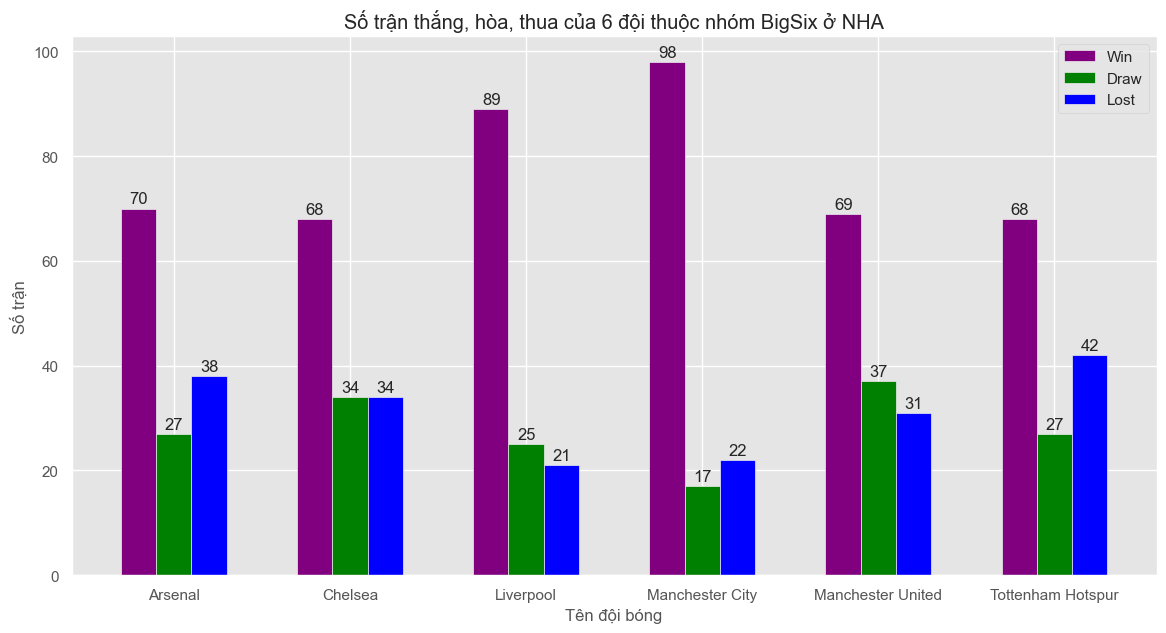

In [203]:
# vẽ biểu đồ
X_axis = np.arange(len(team_result.index))
plt.figure(figsize=(14, 7))  # thiết lập size cho bảng
plt.bar(X_axis - 0.2, team_result['W'], 0.2, label='Win', color='purple')
plt.bar(X_axis, team_result['D'], 0.2, label='Draw', color='green')
plt.bar(X_axis + 0.2, team_result['L'], 0.2, label='Lost', color='blue')
plt.xticks(X_axis, team_result['team'])
plt.title("Số trận thắng, hòa, thua của 6 đội thuộc nhóm BigSix ở NHA")
plt.xlabel("Tên đội bóng")
plt.ylabel("Số trận")

for index, data in enumerate(team_result["W"]):
    plt.text(x=index - 0.25, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["D"]):
    plt.text(x=index - 0.05, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["L"]):
    plt.text(x=index + 0.15, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

plt.legend()


### Giải thích biểu đồ
Trục x biểu diện tổng số trận đấu các đội bóng đã chơi (từ năm 2020-2023 (vẫn còn đang cập nhật)), trục y biểu diễn cho tên các đội bóng nằm trong nhóm big six của ngoại hạng anh. Mội đội sẽ được biểu diễn 3 cột dữ liệu để tượng trưng cho số trận thắng, thua, hòa của mỗi đội. Cột màu tím biểu diễn số trận thắng, cột màu xanh lá biểu diễn cho số trận hòa, cột màu xanh dương biểu diễn cho số trận thua. 
### Lý do chọn biểu đồ ***Multiple bar chart***
Biểu đồ nhiều cột giúp ích cho việc so sánh các trường dữ liệu. Dựa vào biểu đồ ta dễ dạng biết được đội bóng có số trận thắng, thua, hòa là bao nhiêu. Đồng thời quan sát được sự chênh lệch về độ cao của các cột dữ liệu, điều này rất hữu ích cho việc so sánh các đội bóng với nhau  trên cùng một trường dữ liệu. Từ đó cho thấy đội bóng nào đã và đang thể hiện bộ mặt tích cực (nhờ số trận thắng) và đội bóng nào đang thể hiện bộ mặt bết bát (nhờ số trận thua).
### Phân tích kết quả từ biểu đồ
* Từ biểu độ ta thấy sự chênh lệch rõ ràng về số trận thằng, thua và hòa của các đội bóng thuộc big six. Cột thằng (màu tím) càng cao thì thể hiện đội bóng càng mạnh trong giai đoạn (2020-2023), cột xanh nước biển càng cao thì thể hiện đội bóng càng yếu trong giai đoạn (2020-2023)
* Qua biểu đồ, ta có thể thấy Manchester City áp đảo với 98 trận thắng và chỉ vỏn vẹn 22 trận thua (gần như thấp nhất chỉ sau Liverpool). Còn Tottenham Hotspur có cột thua cao nhất (không quá chênh lệch nhiều).
* Từ đó, ta thấy trong giai đoạn 2020-2023 ở ngoại hạng anh, Manchester City là đội mạnh nhất có các chỉ số thằng, thua, hòa đều vượt trội so với phần còn lại.

In [13]:
# df.groupby(['round'])['season'].value_counts().unstack()
team_4_ss = df.groupby(['team'])['season'].nunique().reset_index(name='count')
team_4_ss_list = team_4_ss[team_4_ss['count']==4]['team'].to_list()
team_4_ss = df[df.team.isin(team_4_ss_list)]
team_4_ss

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,4-3-3,Michael Oliver,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,4-2-3-1,David Coote,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,4-3-3,Jarred Gillett,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,4-2-3-1,Darren England,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,4-2-3-1,Paul Tierney,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,2020-07-09,20:15,34,Thu,Home,L,0.0,3.0,Manchester Utd,0.5,...,4-4-1-1,Jonathan Moss,9.0,1.0,20.4,1.0,0.0,0.0,2020,Aston Villa
42,2020-07-12,14:15,35,Sun,Home,W,2.0,0.0,Crystal Palace,1.7,...,4-3-3,Martin Atkinson,12.0,9.0,18.5,1.0,0.0,0.0,2020,Aston Villa
43,2020-07-16,18:00,36,Thu,Away,D,1.0,1.0,Everton,1.3,...,4-3-3,Anthony Taylor,15.0,1.0,18.7,1.0,0.0,0.0,2020,Aston Villa
44,2020-07-21,20:15,37,Tue,Home,W,1.0,0.0,Arsenal,0.6,...,4-3-3,Chris Kavanagh,8.0,3.0,17.9,0.0,0.0,0.0,2020,Aston Villa


In [14]:
print(df['team'].nunique())
team_4_ss['team'].nunique()

25


15

In [15]:
total_goals = df.groupby(['team'])['gf'].sum().reset_index()
total_wins = df.groupby(['team'])['result'].value_counts().unstack().reset_index()
total_wins = total_wins.drop(['team','D','L'],axis=1)
df_1 = pd.concat([total_goals, total_wins],axis=1)
df_1

,team,gf,W
0,Arsenal,218.0,70
1,Aston Villa,174.0,46
2,Bournemouth,60.0,13
3,Brentford,84.0,21
4,Brighton and Hove Albion,160.0,40
5,Burnley,110.0,32
6,Chelsea,226.0,68
7,Crystal Palace,142.0,40
8,Everton,150.0,45
9,Fulham,61.0,15


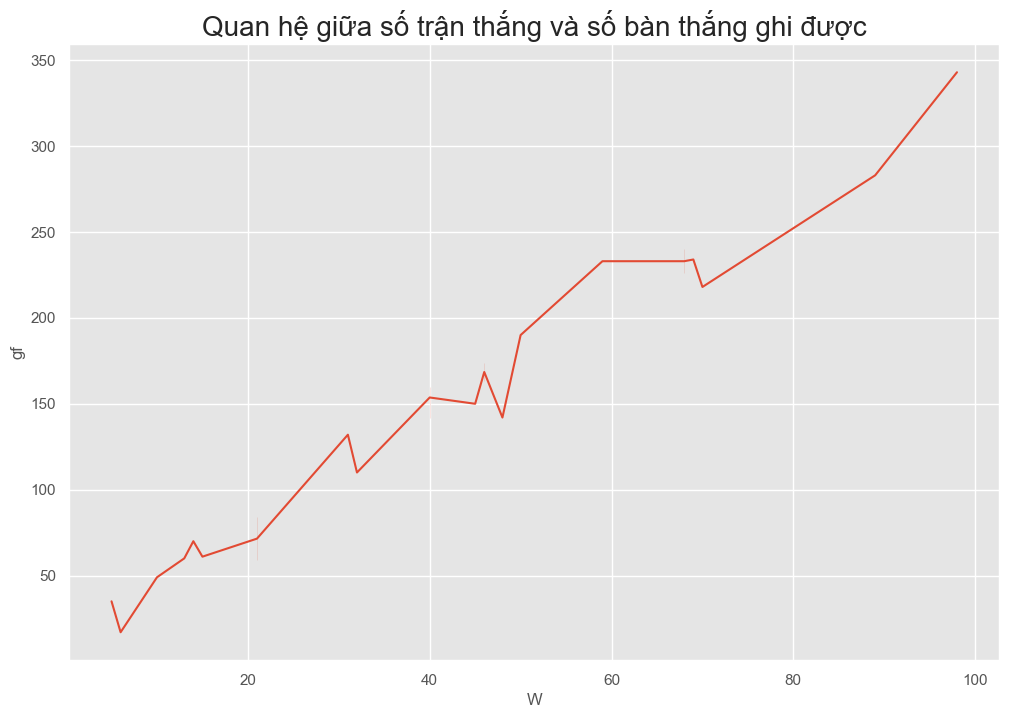

In [16]:
sns.set(style = "dark", palette = "deep", color_codes = True)
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

sns.lineplot(data=df_1, x="W", y="gf")
plt.title('Quan hệ giữa số trận thắng và số bàn thắng ghi được', fontsize = 20)

plt.show()

In [17]:
total_goals_week = df.groupby(['round','team'])['gf'].sum().reset_index()

total_goals_week

,round,team,gf
0,1,Arsenal,6.0
1,1,Aston Villa,3.0
2,1,Bournemouth,3.0
3,1,Brentford,4.0
4,1,Brighton and Hove Albion,8.0
...,...,...,...
929,38,Tottenham Hotspur,10.0
930,38,Watford,3.0
931,38,West Bromwich Albion,1.0
932,38,West Ham United,5.0


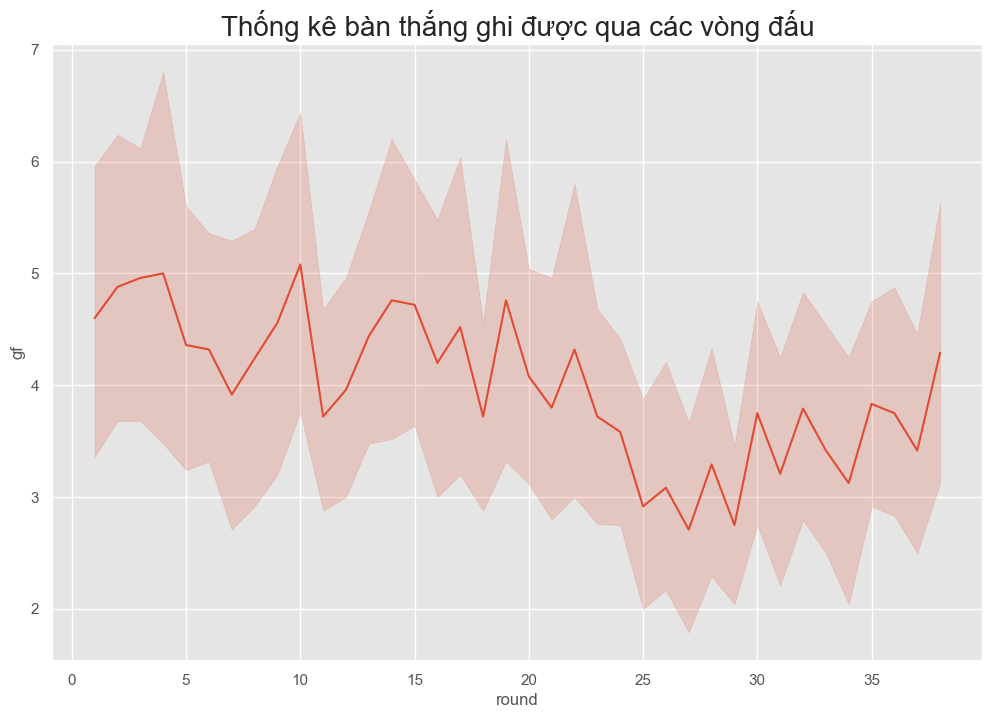

In [18]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=total_goals_week,x='round',y='gf')
plt.title('Thống kê bàn thắng ghi được qua các vòng đấu', fontsize = 20)

plt.show()

In [99]:
total_hour = df[['time','day']].value_counts().sort_index()
total_hour = total_hour.fillna(0).reset_index(name='density')
df_order = total_hour.copy()
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_order['day'] = pd.Categorical(df_order['day'], order)
df_order.sort_values(by=['day'], inplace=True)
total_hour

,time,day,density
0,12:00,Sun,60
1,12:30,Mon,2
2,12:30,Sat,214
3,12:30,Thu,2
4,12:30,Wed,4
5,13:30,Sun,2
6,14:00,Sun,304
7,14:05,Sun,10
8,14:15,Sun,22
9,15:00,Mon,10


Text(0, 0.5, 'Time')

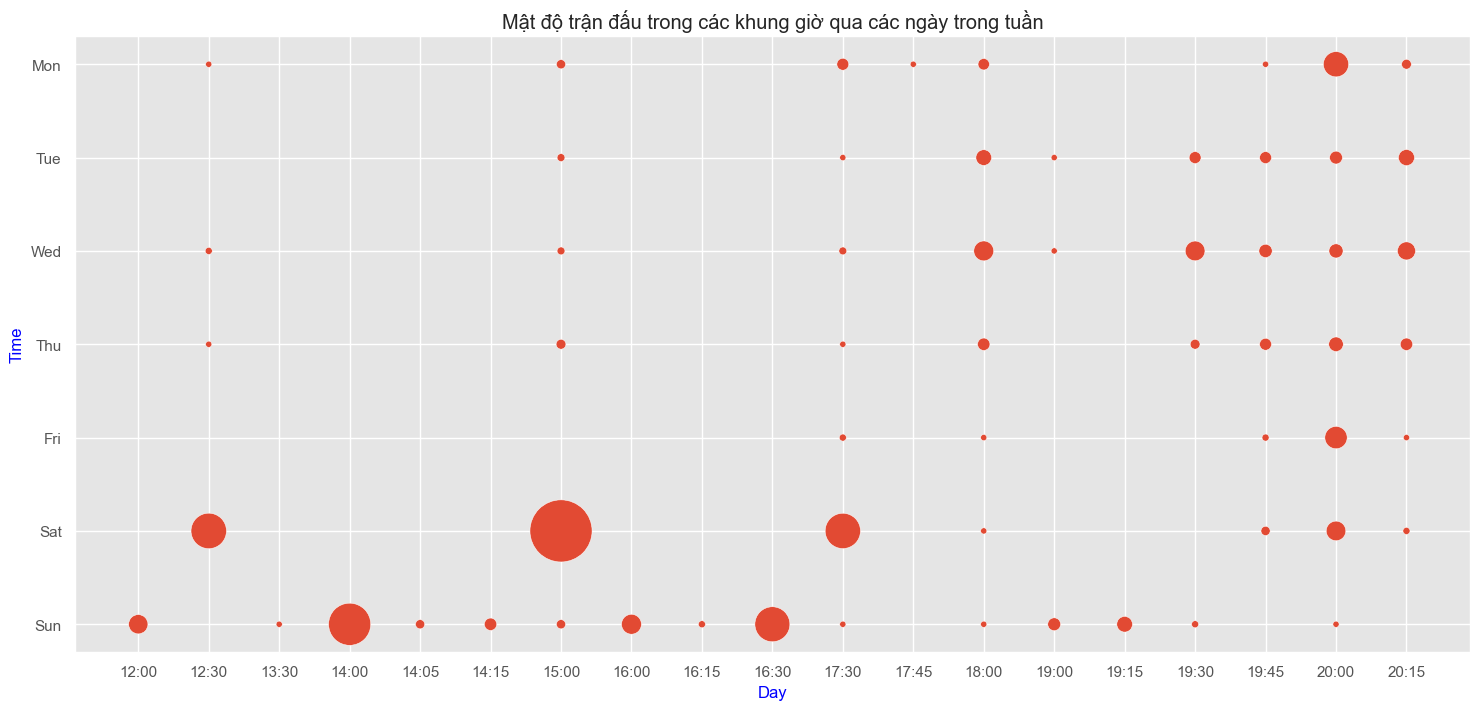

In [131]:
plt.subplots(figsize=(18,8))
sns.scatterplot(data=total_hour, x='time', y=df_order.day, size='density', legend=False, sizes=(20, 2000))
plt.title('Mật độ trận đấu trong các khung giờ qua các ngày trong tuần')
plt.xlabel('Day',color="blue")
plt.ylabel('Time',color="blue")

In [125]:
total_goals_hour = df.groupby(['time'])['gf'].sum().reset_index()

total_goals_hour['game'] = df['time'].value_counts().sort_index().values
total_goals_hour['mean_goals'] = total_goals_hour.gf/total_goals_hour.game
total_goals_hour


,time,gf,game,mean_goals
0,12:00,87.0,60,1.450000
1,12:30,294.0,222,1.324324
2,13:30,2.0,2,1.000000
3,14:00,406.0,304,1.335526
4,14:05,18.0,10,1.800000
5,14:15,30.0,22,1.363636
6,15:00,985.0,710,1.387324
7,16:00,110.0,64,1.718750
8,16:15,4.0,4,1.000000
9,16:30,333.0,208,1.600962


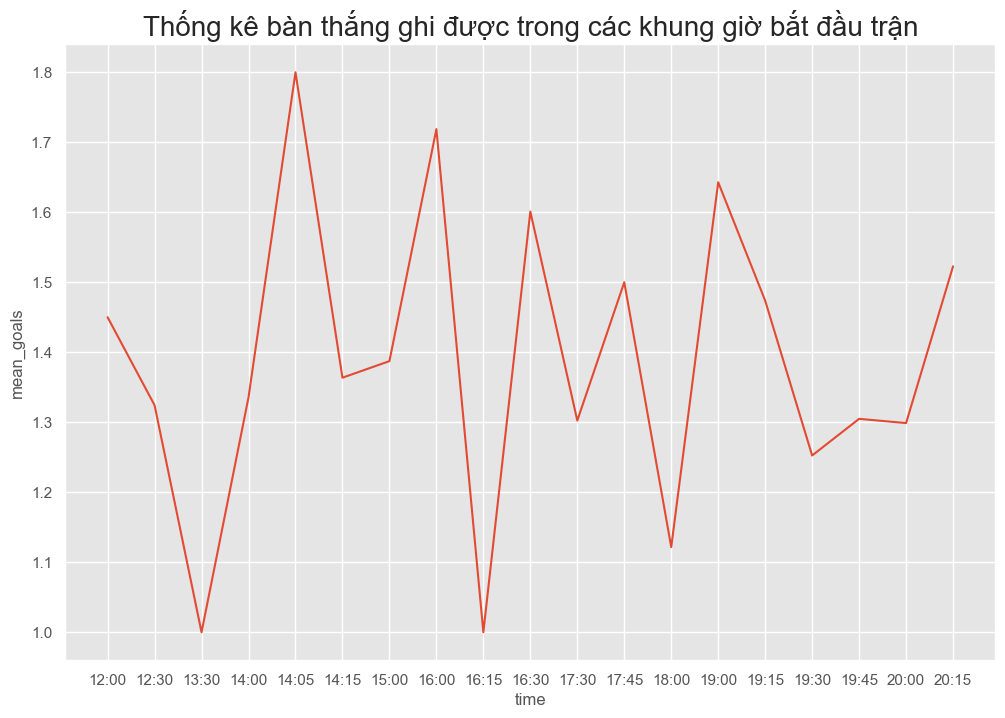

In [129]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=total_goals_hour,x='time',y='mean_goals')
plt.title('Thống kê bàn thắng ghi được trong các khung giờ bắt đầu trận', fontsize = 20)

plt.show()